In [48]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [49]:
path = "C:\\Users\\John\\Desktop\\Old_PhotoZ\\photoZ_visual\\PhotoZ_upgrades\\UnitTest1\\TestData\\"

image_version = "raw-full-out450"

height = 40 # height of the final image
quadrantSize = 10240 * 2 * 4
delim=' '

height *= 2
final = np.genfromtxt(path + "OutputCDS-" + image_version + ".txt", delimiter = "\t") # always tab-delim
processed = np.genfromtxt(path + "Output-" + image_version + ".txt", delimiter = "\t") # always tab-delim
raw = np.genfromtxt(path + "RLI-" + image_version + ".txt", delimiter = delim)


raw_img = raw[:quadrantSize,1].reshape(height,-1)
processed_img = processed[:quadrantSize,1].reshape(height,-1)
final_img = final[:quadrantSize // 2,1].reshape(height // 2,-1) # CDS-correct image is half the height. Reset rows were removed


print("Shaping final image to:",height // 2, quadrantSize // height)
print(raw_img.shape, processed_img.shape, final_img.shape)


Shaping final image to: 40 1024
(80, 1024) (80, 1024) (40, 1024)


<IPython.core.display.Javascript object>


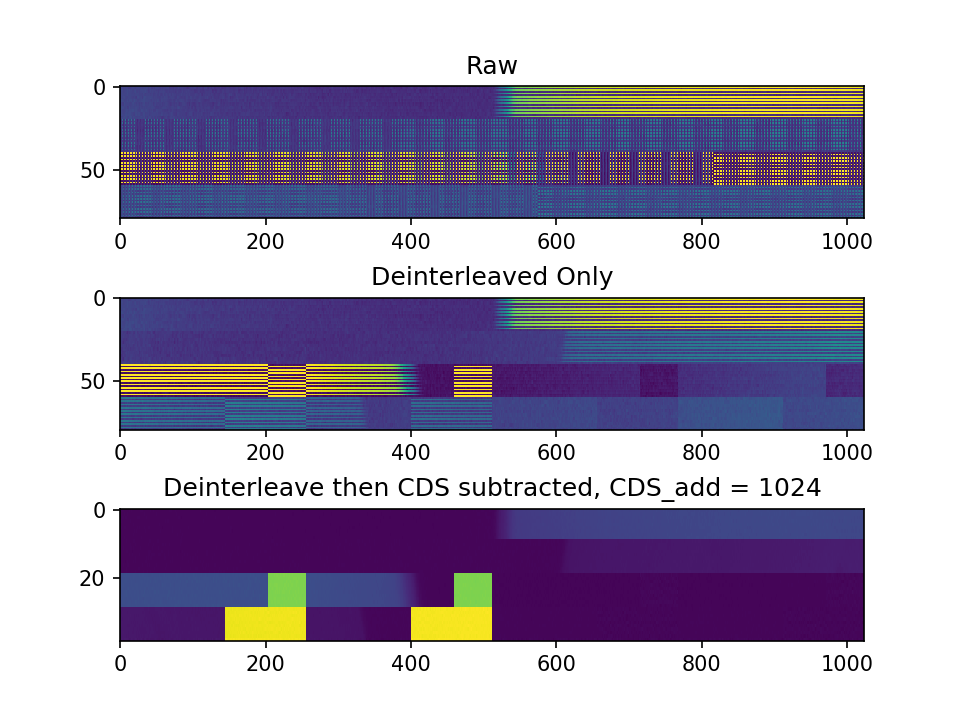

In [50]:
fig = plt.figure()

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)


ax1.set_title("Raw")
ax2.set_title("Deinterleaved Only")
ax3.set_title("Deinterleave then CDS subtracted, CDS_add = 1024")

ax2.imshow(processed_img, aspect='auto')
ax1.imshow(raw_img, aspect='auto')
ax3.imshow(final_img[1:,:], aspect='auto')


fig.subplots_adjust(hspace = 0.6)

#ax2.axes.xaxis.set_visible(False)
#ax1.axes.xaxis.set_visible(False)

plt.show()
plt.savefig('readout-RLI-' + image_version + ".png")

<IPython.core.display.Javascript object>


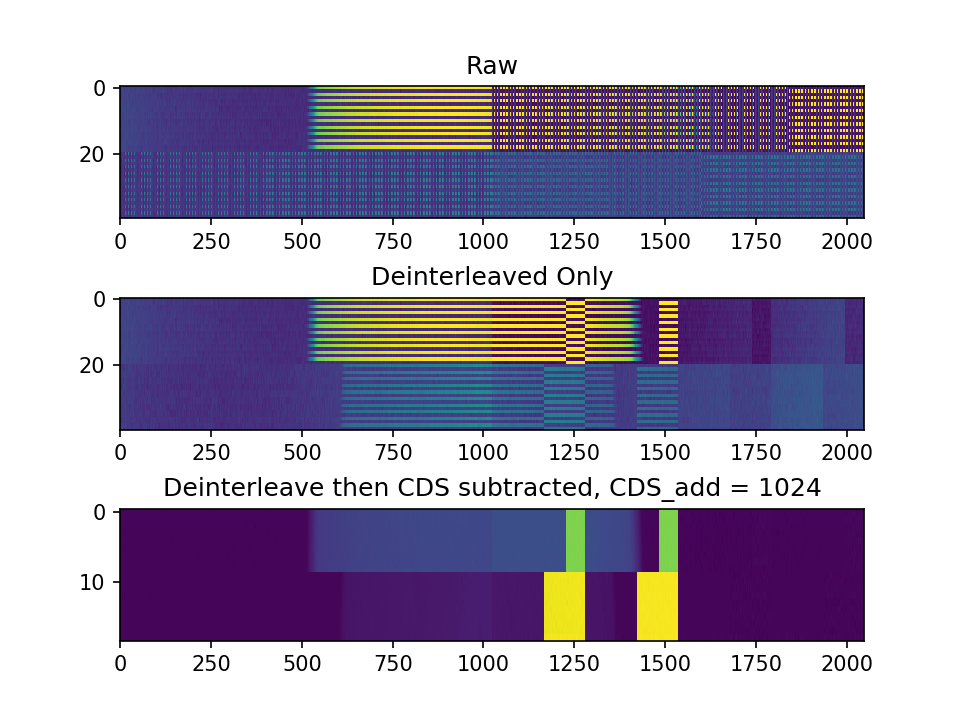

In [51]:

def remapQuadrants(img):
    # Place second half to the right of the first half
    h,w = img.shape

    half1 = img[:h//2,:]
    half2 = img[h//2:,:]
    img = np.zeros((h//2, w*2))
    img[:,:w] = half1
    img[:,w:] = half2
    return img

raw_img = remapQuadrants(raw_img)
processed_img = remapQuadrants(processed_img)
final_img = remapQuadrants(final_img)

fig = plt.figure()

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)


ax1.set_title("Raw")
ax2.set_title("Deinterleaved Only")
ax3.set_title("Deinterleave then CDS subtracted, CDS_add = 1024")

ax2.imshow(processed_img, aspect='auto')
ax1.imshow(raw_img, aspect='auto')
ax3.imshow(final_img[1:,:], aspect='auto')


fig.subplots_adjust(hspace = 0.6)

#ax2.axes.xaxis.set_visible(False)
#ax1.axes.xaxis.set_visible(False)

plt.show()
plt.savefig('readout-RLI-' + image_version + ".png")
